In [45]:
import numpy as np
import json
from scipy.cluster import hierarchy
from scipy.spatial import distance
from sklearn.metrics import rand_score
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

from hypergraphs_distances import DunnIndex

In [47]:
# Define function to add labels
def add_labels(ax, group_positions, group_labels, x_offset=-0.5, text_offset=-1.2, fontsize=16):

    for i, (start, end) in enumerate(group_positions):
        mid = (start + end) / 2
        ax.text(text_offset, mid, group_labels[i], va="center", ha="right", fontsize=fontsize)        

# 1 - Projection-preserving null models

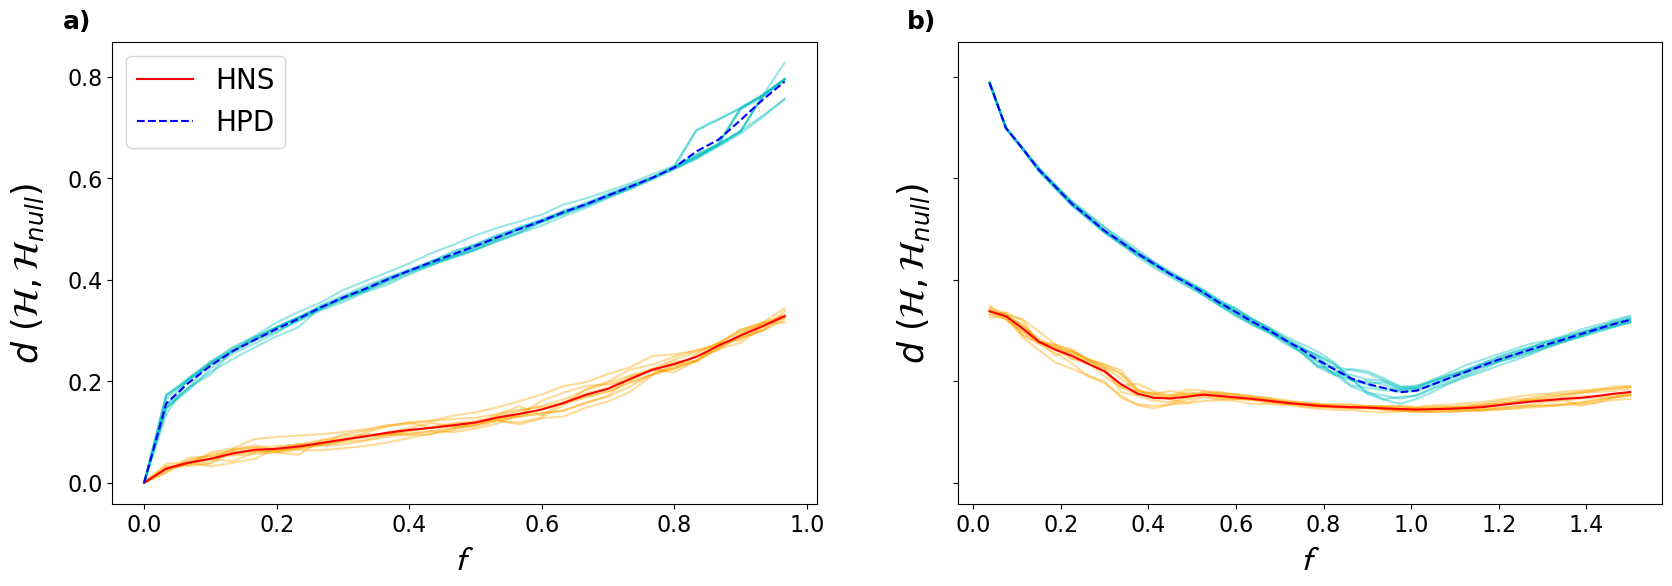

In [17]:
mpl.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(20,6), sharey=True)

for i in range(2): 

    nm = ['rhp','rcp'][i]
    with open(f"../results/null_{nm}_HNS_HPD_SocioPatterns_LH10.json", "r") as fp:
        data_lists = json.load(fp)
    x = data_lists[0]
    HNS_curves = data_lists[1]
    HPD_curves = data_lists[2]
    
    for j in range(len(HNS_curves)):
        axs[i].plot(x, HNS_curves[j], color='orange', linestyle='-', alpha=0.4)
        axs[i].plot(x, HPD_curves[j], color='c', linestyle='-', alpha=0.4)
    
    axs[i].plot(x, np.mean(HNS_curves, axis=0), color='r', linestyle='-', label='HNS')
    axs[i].plot(x, np.mean(HPD_curves, axis=0), color='b', linestyle='--', label='HPD')
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_ylabel(r'$d\ (\mathcal{H}, \mathcal{H}_{null})$', fontsize=25, labelpad=15)
    axs[i].set_xlabel(r'$\mathcal{f}$', fontsize=25)


axs[0].legend(fontsize=20)

subplot_labels = ['a)', 'b)']
for ax, label in zip(axs, subplot_labels):
    ax.text(-0.03, 1.07, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

plt.savefig('../figures/fig_prj_null_model_LH10.pdf', dpi=130, format='pdf')

plt.show()

# 2.1 - Clustering of hypergraph models

In [19]:
with open('../results/HNS_HPD_NS_PD_distances_models.json') as file:
    res = json.load(file)

labels = res[0]
dists = [res[i] for i in range(1,5)]

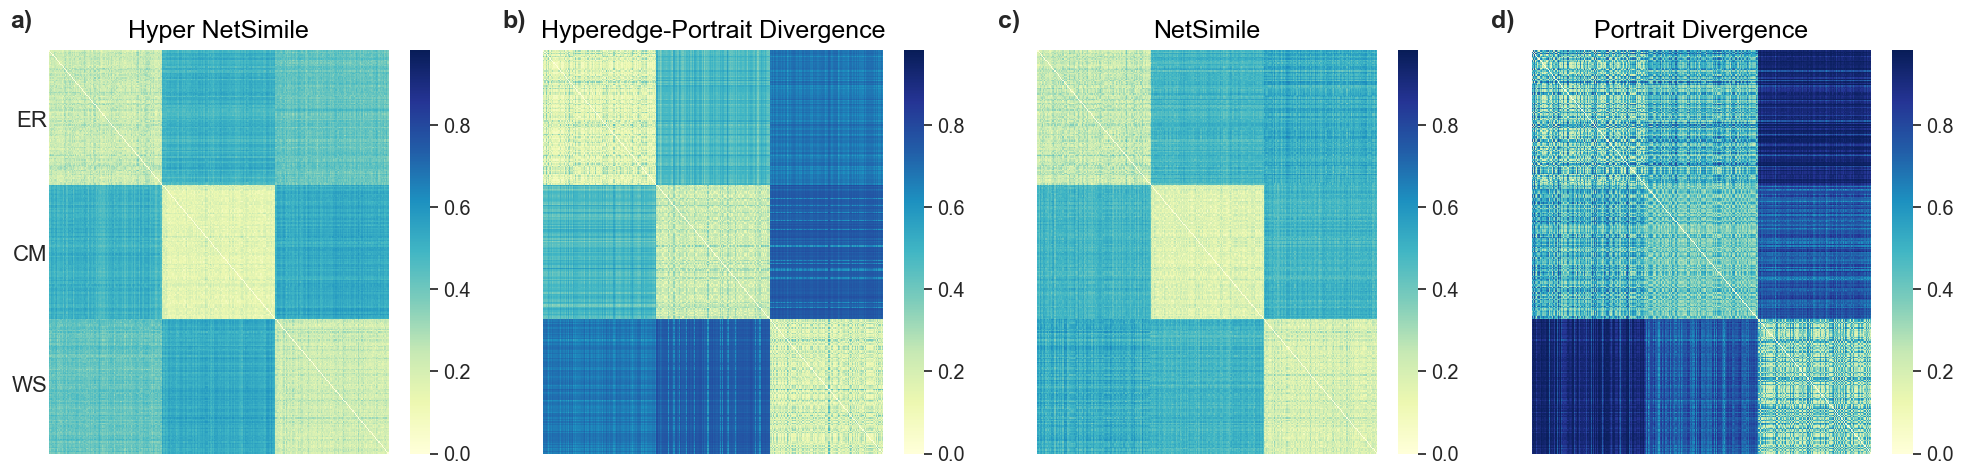

In [21]:
fig, axs = plt.subplots(1,4, figsize=(20, 5))
    
axs[0].set_title('Hyper NetSimile', fontsize=18, y=1.01)
axs[1].set_title('Hyperedge-Portrait Divergence', fontsize=18, y=1.01)
axs[2].set_title('NetSimile', fontsize=18, y=1.01)
axs[3].set_title('Portrait Divergence', fontsize=18, y=1.01)
sb.set(font_scale=1.3)

# set same colorbar for all subplots
values = np.hstack([np.ravel(d) for d in dists])
norm = mpl.colors.Normalize(0, values.max()) 

for i in range(len(dists)):
    sb.heatmap(distance.squareform(dists[i]), cmap='YlGnBu', ax=axs[i],
               norm=norm, xticklabels=False, yticklabels=False)

# Define group positions and labels
group_positions = [(0,105), (0, 305), (0,500)]
group_labels = ["ER", "CM", "WS"]

# Add model labels to axs[0]
add_labels(axs[0], group_positions, group_labels, x_offset=-2, text_offset=-1.2)

# Add subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)']
for ax, label in zip(axs, subplot_labels):
    ax.text(-0.05, 1.1, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig('../figures/fig_sim_matrices_models.pdf', dpi=130, format='pdf')
plt.show()

In [22]:
# compute Rand and Dunn Index
n_samp = int(len(labels)/3)
true_labels = [0]*n_samp + [1]*n_samp + [2]*n_samp
methods = ['single', 'average']

for method in methods:
    print(f'method: {method}')
    RI, DI = [], []
    for d in dists:
        zz = hierarchy.linkage(np.array(d), method)
        pred_labels = hierarchy.cut_tree(zz, n_clusters=3).flatten()
        RI.append(rand_score(true_labels, pred_labels) )
        DI.append(DunnIndex(d, 3, method))

    print("Rand index: ", RI, "\nDunn's  index:   ", DI, '\n')

method: single
Rand index:  [1.0, 1.0, 1.0, 0.7770568561872909] 
Dunn's  index:    [0.7861080360698516, 0.6186462734756747, 0.80949329027333, 0.36464245276312857] 

method: average
Rand index:  [1.0, 1.0, 1.0, 0.7775919732441472] 
Dunn's  index:    [0.7861080360698516, 0.6186462734756747, 0.80949329027333, 0.18913517823520704] 



# 2.2 - Clustering of ER models with different hyperede sizes

In [33]:
with open('../results/HNS_HPD_NS_PD_distances_ERs_3_4_5_6.json') as file:
    res = json.load(file)

labels = res[0]
dists = [res[i] for i in range(1,5)]

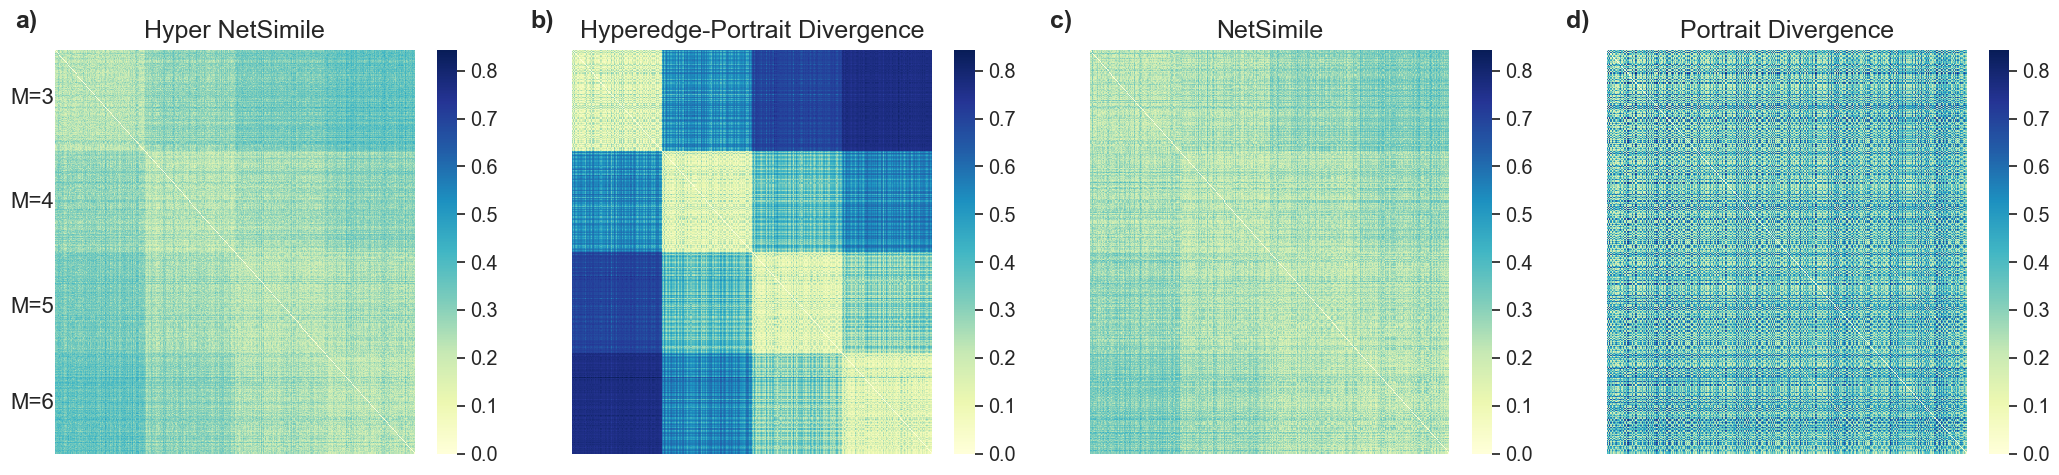

In [35]:
fig, axs = plt.subplots(1,4, figsize=(21, 5))
    
axs[0].set_title('Hyper NetSimile', fontsize=18, y=1.01)
axs[1].set_title('Hyperedge-Portrait Divergence', fontsize=18, y=1.01)
axs[2].set_title('NetSimile', fontsize=18, y=1.01)
axs[3].set_title('Portrait Divergence', fontsize=18, y=1.01)
sb.set(font_scale=1.3)

# set same colorbar for all subplots
values = np.hstack([np.ravel(d) for d in dists])
norm = mpl.colors.Normalize(0, values.max()) 

for i in range(len(dists)):
    sb.heatmap(distance.squareform(dists[i]), cmap='YlGnBu', ax=axs[i], 
               norm=norm, xticklabels=False, yticklabels=False)

# Define group positions and labels for brackets
group_positions = [(0,95), (0, 300), (0,510), (0,700)]
group_labels = ["M=3", "M=4", "M=5", "M=6"]

# Add model labels to axs[0]
add_labels(axs[0], group_positions, group_labels=group_labels, x_offset=-2, text_offset=-1.2)

# Add subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)']
for ax, label in zip(axs, subplot_labels):
    ax.text(-0.05, 1.1, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

plt.tight_layout()
#plt.savefig('../figures/fig_sim_matrices_ERs.pdf', dpi=130, format='pdf')
plt.show()

In [37]:
# compute Rand and Dunn Index
n_samp = int(len(labels)/4)
true_labels = [0]*n_samp + [1]*n_samp + [2]*n_samp + [3]*n_samp
methods = ['single', 'average']

for method in methods:
    print(f'method: {method}')
    RI, DI = [], []
    for d in dists:

        zz = hierarchy.linkage(np.array(d), method)
        pred_labels = hierarchy.cut_tree(zz, n_clusters=4).flatten()
        RI.append(rand_score(true_labels, pred_labels) )
        DI.append(DunnIndex(d, 4, method))

    print("Rand index: ", RI, "\nDunn's  index:   ", DI, '\n')

method: single
Rand index:  [0.2556641604010025, 0.8746992481203008, 0.2557142857142857, 0.2556641604010025] 
Dunn's  index:    [0.4160136445569369, 0.3697252997418027, 0.38484050178199036, 0.2642834400361461] 

method: average
Rand index:  [0.6278822055137845, 1.0, 0.3016666666666667, 0.5568796992481203] 
Dunn's  index:    [0.39915535840715244, 0.41978008227680813, 0.3134480338884391, 0.20154105483053425] 



# 3 - Clustering of reshuffling methods

In [55]:
with open('../results/reshuffling_HNS_HPD_NS_PD_SocioPatterns_LH10.json') as file:
    res = json.load(file)
    
labels = res[0]
a = len(labels)-1

dists = [res[i][a:] for i in range(1,5)]
# isolate distances between orignal hypergraph and null models
dists_orig = [res[i][:a] for i in range(1,5)]

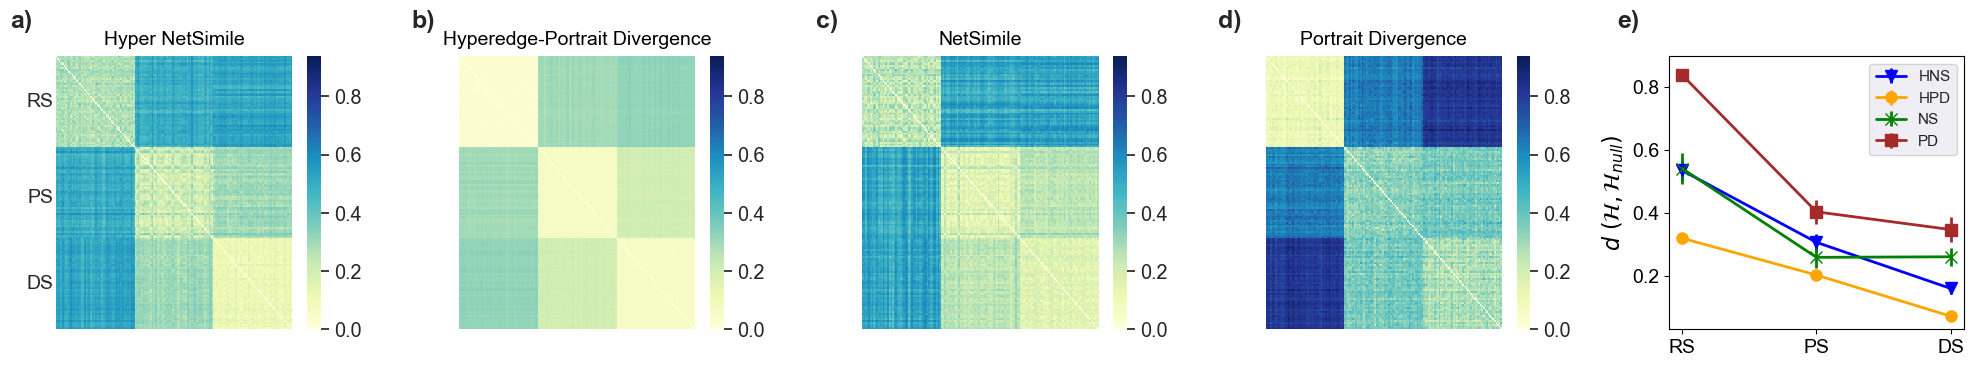

In [57]:
mpl.style.use('default')
fig, axs = plt.subplots(1,5, figsize=(20, 4))
    
axs[0].set_title('Hyper NetSimile', fontsize=14, y=1.01)
axs[1].set_title('Hyperedge-Portrait Divergence', fontsize=14, y=1.01)
axs[2].set_title('NetSimile', fontsize=14, y=1.01)
axs[3].set_title('Portrait Divergence', fontsize=14, y=1.01)
sb.set(font_scale=1.3)

# set same colorbar for all subplots
values = np.hstack([np.ravel(d) for d in dists])
norm = mpl.colors.Normalize(0, values.max()) 

for i in range(len(dists)):
    sb.heatmap(distance.squareform(dists[i]), cmap='YlGnBu', ax=axs[i],
               norm=norm, xticklabels=False, yticklabels=False)

# Define group positions and labels for brackets
group_positions = [(0, 50), (0, 155), (0,250)]
group_labels = ["RS", "PS", "DS"]

# Add model labels to axs[0]
add_labels(axs[0], group_positions, group_labels=group_labels,
           x_offset=-2, text_offset=-1.2, fontsize=14)

# Last plot
L = int(len(dists_orig[0])/3)
axs[4].set_ylabel(r'$d\ (\mathcal{H}, \mathcal{H}_{null})$', fontsize=16)

x = [1,2,3]
colors = ['blue', 'orange', 'green', 'brown']
d_labels = ['HNS', 'HPD', 'NS', 'PD']
markers = ['v','o','x','s']
for (clr, d, lab, mrk) in zip(colors, dists_orig, d_labels, markers):
    d_slices = [d[:L], d[L:2*L], d[2*L:]]
    y = [np.mean(d_s) for d_s in d_slices]
    yerr = [np.std(d_s) for d_s in d_slices]
    axs[4].errorbar(x, y, yerr, ecolor=clr, c=clr, lw=2, marker=mrk, markersize=8, label=lab)

axs[4].legend(fontsize=11)
axs[4].set_xticks(x)
axs[4].set_xticklabels(['RS', 'PS', 'DS'])
axs[4].tick_params(which='major', labelsize=14)

# Add subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)']
for ax, label in zip(axs, subplot_labels):
    ax.text(-0.1, 1.17, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig('../figures/fig_reshuffling_LH10.pdf', dpi=130, format='pdf')
plt.show()

In [58]:
# compute Rand and Dunn Index
n_samp = int( (len(labels)-1) / 3 )
true_labels = [0]*n_samp + [1]*n_samp + [2]*n_samp
methods = ['single', 'average']

for method in methods:
    print(f'method: {method}')
    RI, DI = [], []
    for d in dists:

        zz = hierarchy.linkage(np.array(d), method)
        pred_labels = hierarchy.cut_tree(zz, n_clusters=3).flatten()
        RI.append(rand_score(true_labels, pred_labels) )
        DI.append(DunnIndex(d, 3, method))

    print("Rand index: ", RI, "\nDunn's  index:   ", DI, '\n')

method: single
Rand index:  [0.7719015659955257, 1.0, 0.7719015659955257, 0.7763758389261745] 
Dunn's  index:    [0.6372448106555312, 2.493047232353369, 0.5256309537797624, 0.5218903198679068] 

method: average
Rand index:  [0.7676957494407158, 1.0, 0.7247427293064876, 0.9911409395973154] 
Dunn's  index:    [0.5424619367736688, 2.493047232353369, 0.43793973600700636, 0.47822264662669184] 



Utah_elem_day2_0h-12h 

method: single
Rand index:  [0.7719015659955257, 1.0, 0.7719015659955257, 0.7763758389261745] 
Dunn's  index:    [0.6585443513466748, 4.105405023165435, 0.5888778653788379, 0.7719205808419091] 

method: average
Rand index:  [0.9656375838926174, 1.0, 0.7719015659955257, 0.7763758389261745] 
Dunn's  index:    [0.6288435305205474, 4.105405023165435, 0.5888778653788379, 0.7719205808419091] 

APS_PRC_1992_1996 

method: single
Rand index:  [1.0, 1.0, 1.0, 1.0] 
Dunn's  index:    [1.1936935600472482, 0.8036395043315521, 2.249977703936399, 1.1622702483435363] 

method: average
Rand index:  [1.0, 1.0, 1.0, 1.0] 
Dunn's  index:    [1.1936935600472482, 0.8036395043315521, 2.249977703936399, 1.1622702483435363] 

Online_music_blues_reviews 

method: single
Rand index:  [0.7493512304250559, 0.7676957494407158, 0.7493512304250559, 0.7719015659955257] 
Dunn's  index:    [0.7962270285861331, 1.0623521250072343, 0.7574989737056026, 0.6837444416488484] 

method: average
Rand ind

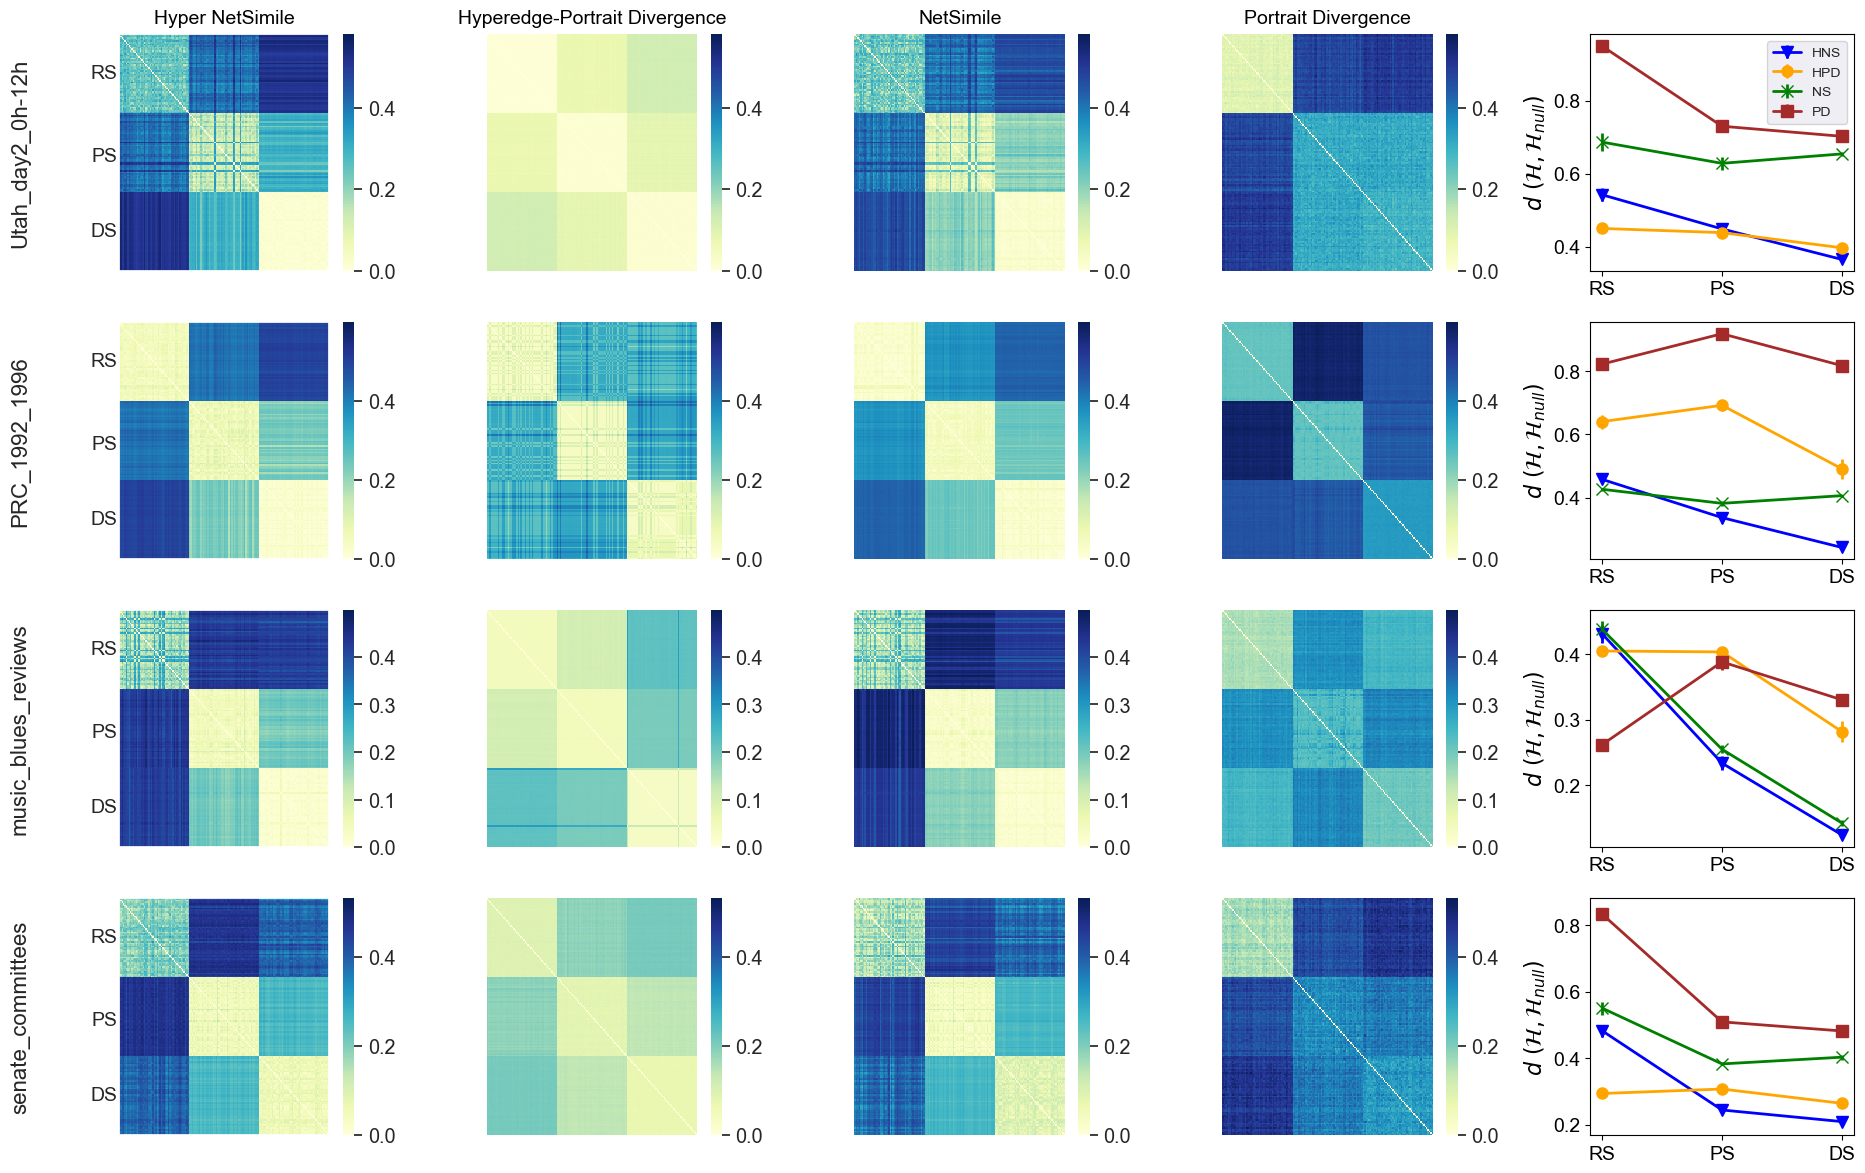

In [5]:
tags = ['Utah_elem_day2_0h-12h', 'APS_PRC_1992_1996',
        'Online_music_blues_reviews', 'Congress_senate_committees']

mpl.style.use('default')
fig, axs = plt.subplots(len(tags), 5, figsize=(19,3*len(tags)))

titles = ['Hyper NetSimile', 'Hyperedge-Portrait Divergence', 'NetSimile', 'Portrait Divergence']
for i in range(len(titles)):
    axs[0,i].set_title(titles[i], fontsize=14, y=1.01)
sb.set(font_scale=1.3)

for i in range(len(tags)):     
    # load data
    with open(f'../results/reshuffling_HNS_HPD_NS_PD_{tags[i]}.json') as file:
        res = json.load(file)        
    labels = res[0]
    a = len(labels)-1 
    dists = [res[i][a:] for i in range(1,5)]
    # isolate distances between orignal hypergraph and null models
    dists_orig = [res[i][:a] for i in range(1,5)]

    # set same colorbar for all subplots in same row
    values = np.hstack([np.ravel(d) for d in dists])
    norm = mpl.colors.Normalize(0, values.max())    
    for j in range(len(dists)):
        sb.heatmap(distance.squareform(dists[j]), cmap='YlGnBu', ax=axs[i,j],
                   norm=norm, xticklabels=False, yticklabels=False)
        
    # Reshuffling method labels
    group_positions = [(0, 50), (0, 155), (0,250)]
    labels_sh = ['RS', 'PS', 'DS']
    
    # Add model labels to axs[0]
    add_labels(axs[i,0], group_positions, group_labels=labels_sh,
               x_offset=-2, text_offset=-1.2, fontsize=14)
    
    # Last column plots
    colors = ['blue', 'orange', 'green', 'brown']
    d_labels = ['HNS', 'HPD', 'NS', 'PD']
    markers = ['v','o','x','s']
    L = int(len(dists_orig[0])/3)  
    for (clr, d, lab, mrk) in zip(colors, dists_orig, d_labels, markers):
        d_slices = [d[:L], d[L:2*L], d[2*L:]]
        y = [np.mean(d_s) for d_s in d_slices]
        yerr = [np.std(d_s) for d_s in d_slices]
        x = [1,2,3]
        axs[i,4].errorbar(x, y, yerr, ecolor=clr, c=clr, lw=2, marker=mrk, markersize=8, label=lab)        
    axs[i,4].set_ylabel(r'$d\ (\mathcal{H}, \mathcal{H}_{null})$', fontsize=16)
    axs[i,4].set_xticks(ticks=x, labels=labels_sh)
    axs[i,4].tick_params(which='major', labelsize=14)

    # add dataset labels
    d_lbl = tags[i].replace('Congress_','').replace('APS_','').replace('elem_','').replace('Online_','')
    ax2 = axs[i,0].twinx()
    ax2.set_ylabel(f'{d_lbl}', fontsize=16, labelpad=-230)
    ax2.set_yticks([])

    # compute Rand and Dunn Index
    n_samp = int( (len(labels)-1) / 3 )
    true_labels = [0]*n_samp + [1]*n_samp + [2]*n_samp
    methods = ['single', 'average']
    print(f'{tags[i]} \n')
    for method in methods:
        print(f'method: {method}')
        RI, DI = [], []
        for d in dists: 
            zz = hierarchy.linkage(np.array(d), method)
            pred_labels = hierarchy.cut_tree(zz, n_clusters=3).flatten()
            RI.append(rand_score(true_labels, pred_labels) )
            DI.append(DunnIndex(d, 3, method))  
        print("Rand index: ", RI, "\nDunn's  index:   ", DI, '\n')

axs[0,4].legend(fontsize=10)

plt.tight_layout()
plt.savefig('../figures/fig_reshuffling_datasets.pdf', dpi=130, format='pdf')
plt.show()

# 4 - Clustering of real-world hypergraphs

In [45]:
with open('../results/HNS_HPD_NS_PD_distances_data.json') as file:
    res = json.load(file) 
labels = res[0]
dists = [res[i] for i in range(1,5)]

labels = [
    l.replace('SocioPatterns_', '').replace('APS_', '').replace('elem_', ''
    ).replace('Online_', '').replace('Congress_', '').replace('Conferences_', '')
    for l in labels ]

In [47]:
# Assign colors to labels for dendrogram
label_colors = dict()
for l in labels:
    if l.startswith('PR'):
        label_colors[l] = 'firebrick'
    elif l.startswith('hou') or l.startswith('sen'):
        label_colors[l] = 'dodgerblue'
    elif l.startswith('mus') or l.startswith('geo') or l.startswith('alg'):
        label_colors[l] = 'darkorange'
    elif l.startswith('Utah'):
        label_colors[l] = 'darkgreen'
    elif l.startswith('CopNS'):
        label_colors[l] = 'slategray'
    else:
        label_colors[l] = 'navy'

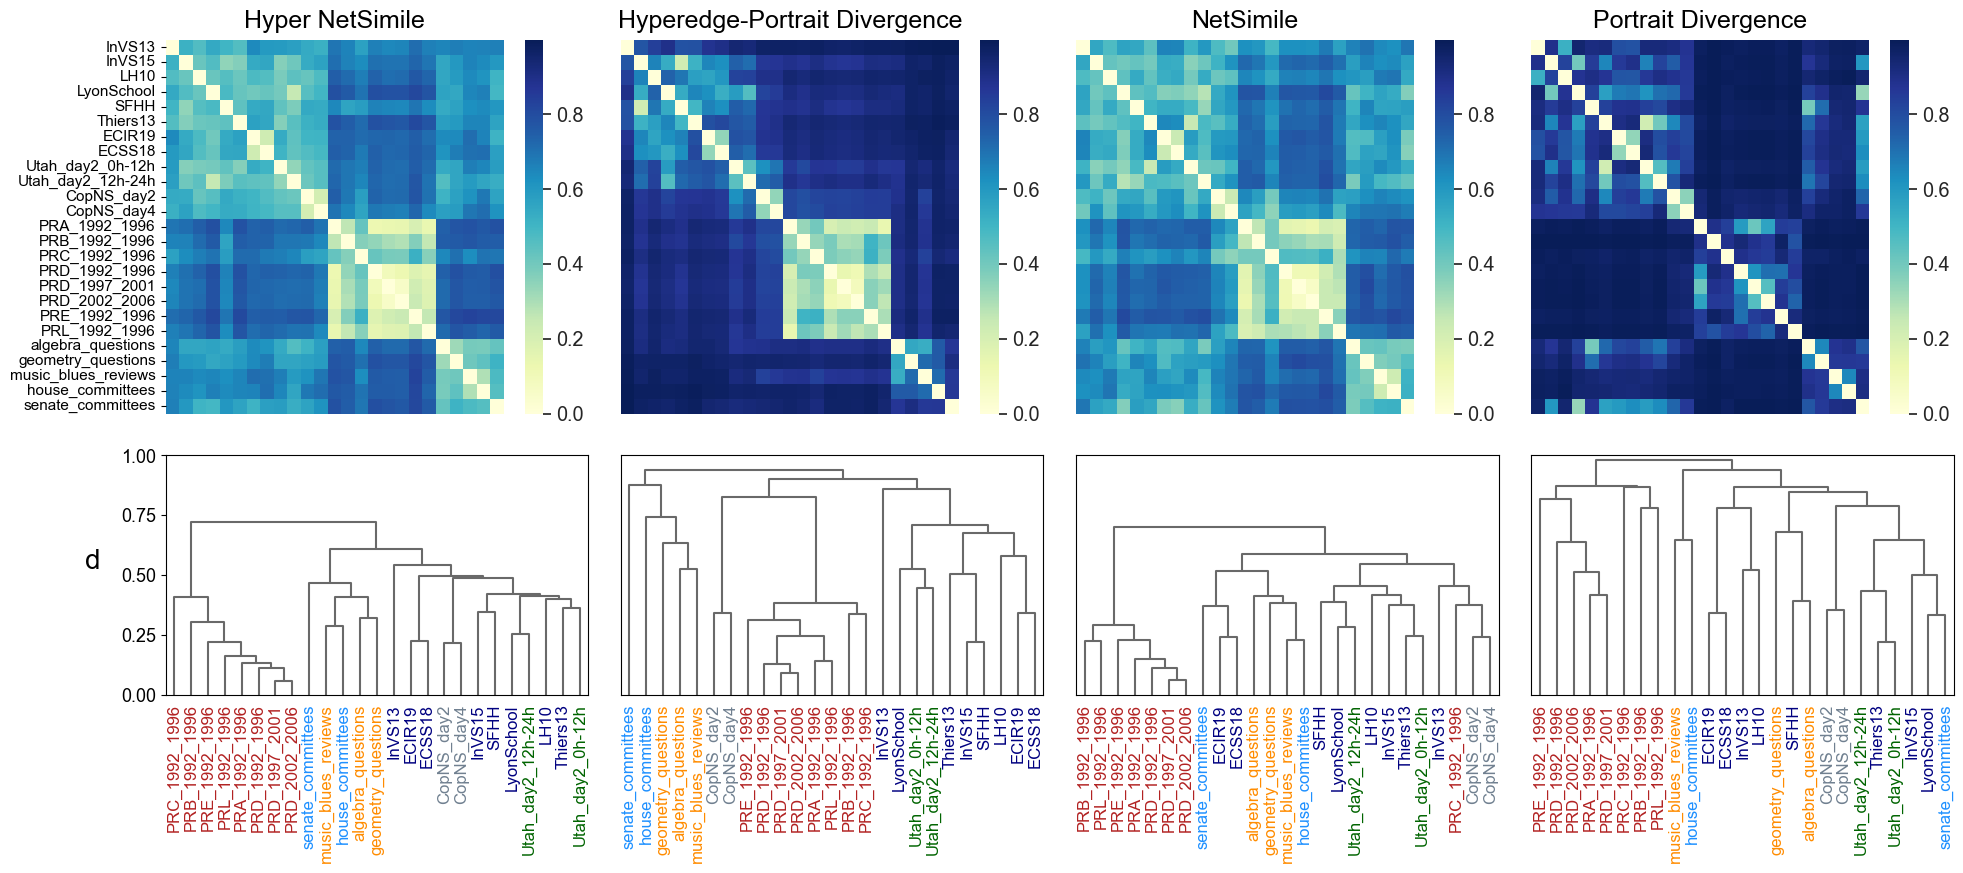

In [59]:
mpl.style.use('default')
fig, axs = plt.subplots(2,4, figsize=(20, 9), gridspec_kw={'height_ratios': [25,16]})
    
titles = ['Hyper NetSimile', 'Hyperedge-Portrait Divergence', 'NetSimile', 'Portrait Divergence']
sb.set(font_scale=1.3)

# set same colorbar for all subplots
values = np.hstack([np.ravel(d) for d in dists])
norm = mpl.colors.Normalize(0, values.max()) 
mtd = 'average'

for i in range(len(dists)):
    ytl = False
    if i==0:
        ytl=True
    sb.heatmap(distance.squareform(dists[i]), cmap='YlGnBu', ax=axs[0,i], norm=norm, 
               xticklabels=False, yticklabels=ytl)
    axs[0,i].set_title(titles[i], fontsize=18, y=1.01)

    Z = hierarchy.linkage(np.array(dists[i]), method=mtd)
    hierarchy.dendrogram(Z, leaf_rotation=90, ax=axs[1,i], labels=labels,
                         leaf_font_size=12, distance_sort='ascending',
                         color_threshold=0, above_threshold_color='dimgray')
    axs[1,i].set_ylim(0,1)
    axs[1,i].set_yticks([])
    xlbls = axs[1,i].get_xmajorticklabels()
    for lbl in xlbls:
        lbl.set_color(label_colors[lbl.get_text()])
        
y_dendr = [0,0.25,0.50,0.75,1.00]
axs[1,0].set_yticks(y_dendr)
axs[1,0].tick_params(axis='y', labelsize=13)
axs[1,0].set_ylabel('d', fontsize=20, rotation=0, labelpad=20)

# add dataset labels
axs[0,0].set_yticklabels(labels, fontsize=11)

plt.tight_layout()
plt.savefig(f'../figures/fig_sim_matrices_dendro_{mtd}_data.pdf', dpi=130, format='pdf')
plt.show()

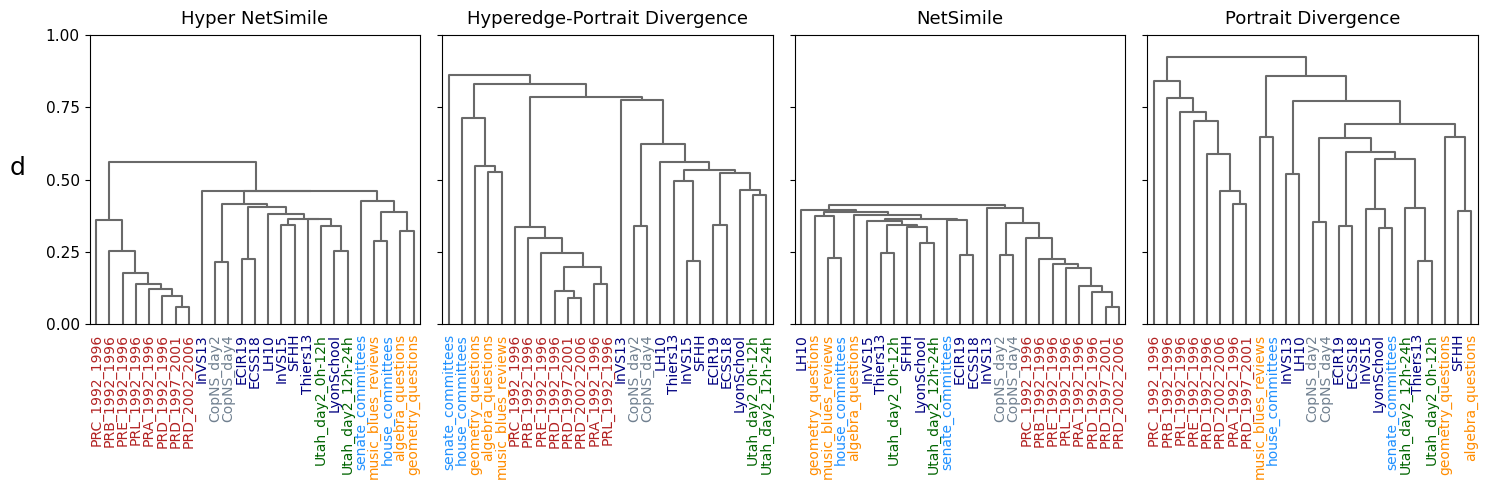

In [61]:
mpl.style.use('default')
mtd = 'single'
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

titles = ['Hyper NetSimile', 'Hyperedge-Portrait Divergence', 'NetSimile', 'Portrait Divergence']

# plot dendrograms
for j in range(len(dists)):
    Z = hierarchy.linkage(np.array(dists[j]), method=mtd)
    hierarchy.dendrogram(Z, leaf_rotation=90, ax=axs[j], labels=labels,
                         leaf_font_size=10, distance_sort='ascending',
                         color_threshold=0, above_threshold_color='dimgray')
    axs[j].set_title(titles[j], fontsize=13, y=1.01)
    xlbls = axs[j].get_xmajorticklabels()
    for lbl in xlbls:
        lbl.set_color(label_colors[lbl.get_text()])

y_dendr = [0,0.25,0.50,0.75,1.00]
axs[0].set_yticks(y_dendr)
axs[0].tick_params(axis='y', labelsize=11)
axs[0].set_ylabel('d', fontsize=18, rotation=0, labelpad=20)


plt.tight_layout()
plt.savefig(f'../figures/fig_dendro_{mtd}_data.pdf', dpi=130, format='pdf')
plt.show()

# Plot for Netsci abstract

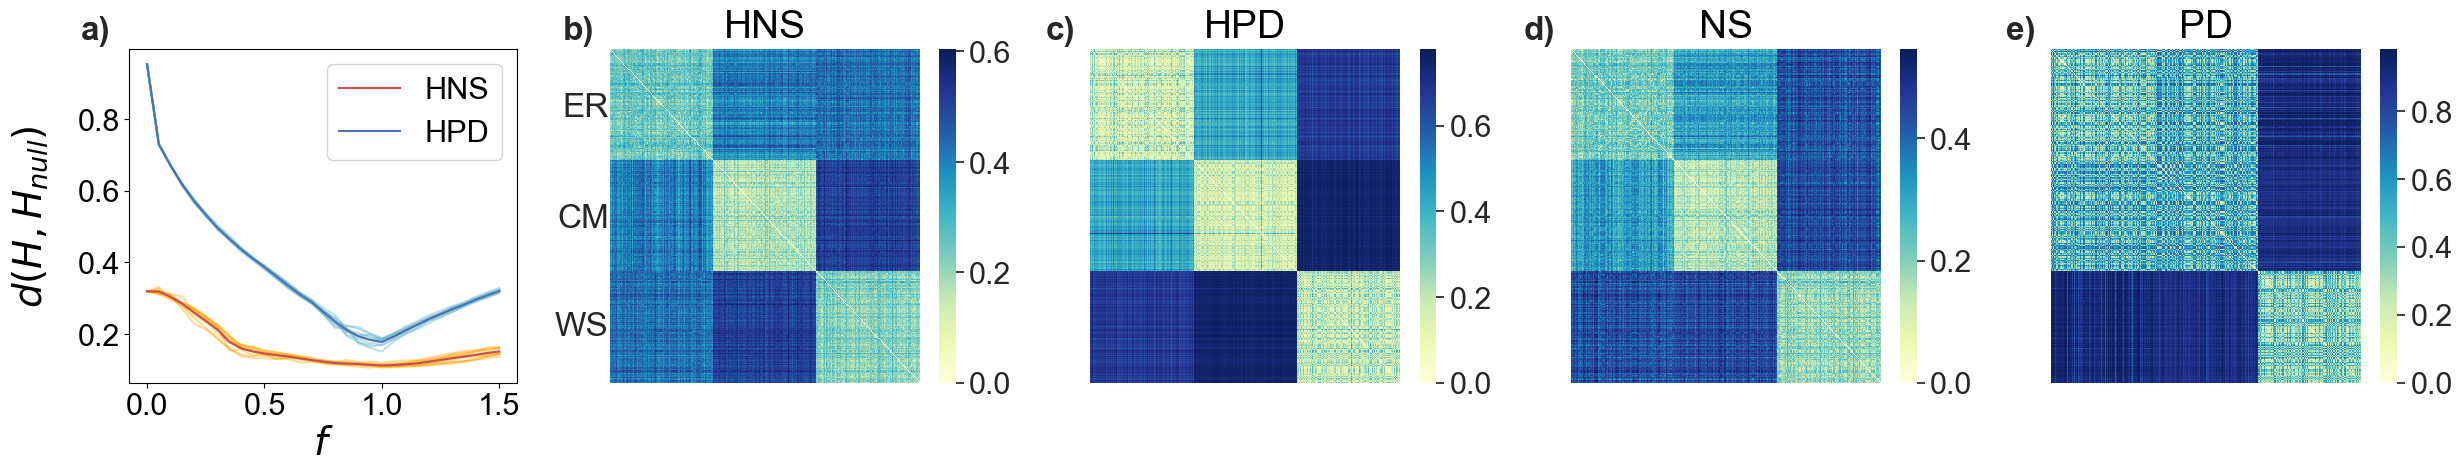

In [23]:
with open('../results/HNS_HPD_NS_PD_distances_models.json') as file:
    res = json.load(file)

labels = res[0]
HNS_dists = res[1]
HPD_dists = res[2] 
NS_dists = res[3]
PD_dists = res[4]

tag = 'SocioPatterns_LH10'
mpl.style.use('default')
fig, axs = plt.subplots(1,5, figsize=(25, 5))

# plot RCP null model
with open(f"../results/null_rcp_HNS_HPD_{tag}.json", "r") as fp:
    data_lists = json.load(fp)
x = data_lists[0]
HNS_curves = data_lists[1]
HPD_curves = data_lists[2]

for j in range(len(HNS_curves)):
    axs[0].plot(x, HNS_curves[j], color='orange', linestyle='-', alpha=0.4)
    axs[0].plot(x, HPD_curves[j], color='c', linestyle='-', alpha=0.4)

axs[0].plot(x, np.mean(HNS_curves, axis=0), color='r', linestyle='-', label='HNS')
axs[0].plot(x, np.mean(HPD_curves, axis=0), color='b', linestyle='-', label='HPD')
axs[0].tick_params(axis='both', labelsize=22)

# add labels, legend, ecc.
axs[0].set_xlabel('$f$', fontsize=28)
axs[0].set_ylabel(r'$d (H, H_{null})$', fontsize=28, labelpad=20)
axs[0].legend(fontsize=22)

# plot dissimilarity matrices
axs[1].set_title('HNS', fontsize=28, y=1.01)
axs[2].set_title('HPD', fontsize=28, y=1.01)
axs[3].set_title('NS', fontsize=28, y=1.01)
axs[4].set_title('PD', fontsize=28, y=1.01)
sb.set(font_scale=1.3)

for i,d in enumerate([HNS_dists,HPD_dists,NS_dists,PD_dists]):
    sb.heatmap(distance.squareform(d), cmap='YlGnBu', ax=axs[i+1], xticklabels=False, yticklabels=False)
    #axs[i+1].collections[0].colorbar.tick_params(labelsize=24)
    cbar = axs[i+1].collections[0].colorbar.ax.tick_params(labelsize=22)

# Define group positions and labels
group_positions = [(0,105), (0, 305), (0,500)]
group_labels = ["ER", "CM", "WS"]

# Add model labels to axs[1]
add_labels(axs[1], group_positions, group_labels, x_offset=-2, text_offset=-1.2, fontsize=24)

# Add subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)']
for ax, label in zip(axs, subplot_labels):
    ax.text(-0.05, 1.1, label, transform=ax.transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

plt.tight_layout()
#plt.savefig('../figures/abstract_netsci_toponet_2025', dpi=130)
plt.show()